## Read in the datasets

In [1]:
#Setup the notebook with my preferences (plot sizes etc.)
library(repr)
options(repr.plot.width = 8, repr.plot.height = 8, repr.plot.pointsize = 8)

In [2]:
NEI <- readRDS("data/summarySCC_PM25.rds")
SSC <- readRDS("data/Source_Classification_Code.rds")

In [3]:
head(NEI)

,fips,SCC,Pollutant,Emissions,type,year
4,09001,10100401,PM25-PRI,15.714,POINT,1999
8,09001,10100404,PM25-PRI,234.178,POINT,1999
12,09001,10100501,PM25-PRI,0.128,POINT,1999
16,09001,10200401,PM25-PRI,2.036,POINT,1999
20,09001,10200504,PM25-PRI,0.388,POINT,1999
24,09001,10200602,PM25-PRI,1.49,POINT,1999


### Plot 1 - Have total emissions from PM2.5 decreased in the United States from 1999 to 2008? Using the base plotting system, make a plot showing the total PM2.5 emission from all sources for each of the years 1999, 2002, 2005, and 2008.

In [23]:
#Calculate the total emissions by year for the US
total_emission <- tapply(NEI$Emission, as.factor(NEI$year), sum)
total_emission <- total_emission/1000000
print(total_emission)

    1999     2002     2005     2008 
7.332967 5.635780 5.454703 3.464206 


In [21]:
x0 <- as.numeric(names(total_emission))


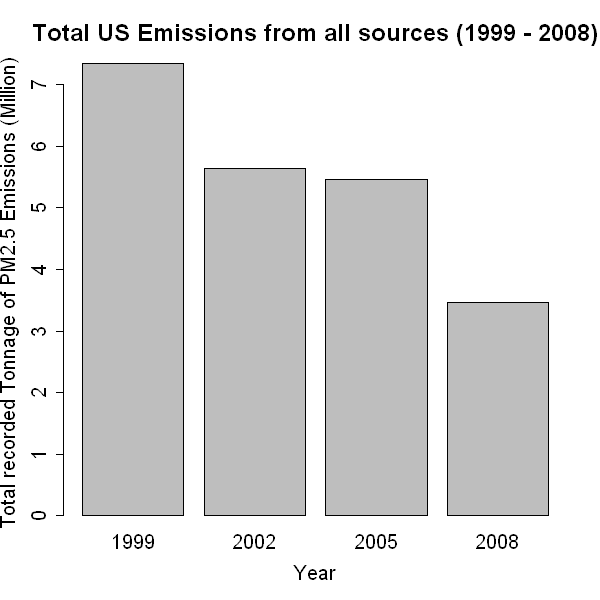

In [28]:
barplot(total_emission, main = "Total US Emissions from all sources (1999 - 2008)", xlab = "Year", ylab = "Total recorded Tonnage of PM2.5 Emissions (Million)" )

### Plot 2 - Have total emissions from PM2.5 decreased in the Baltimore City, Maryland (fips == "24510") from 1999 to 2008? Use the base plotting system to make a plot answering this question.

In [3]:
BaltData <- subset(NEI, fips=="24510")
BaltEmissions <- tapply(BaltData$Emission, as.factor(BaltData$year), sum)
print(BaltEmissions)

    1999     2002     2005     2008 
3274.180 2453.916 3091.354 1862.282 


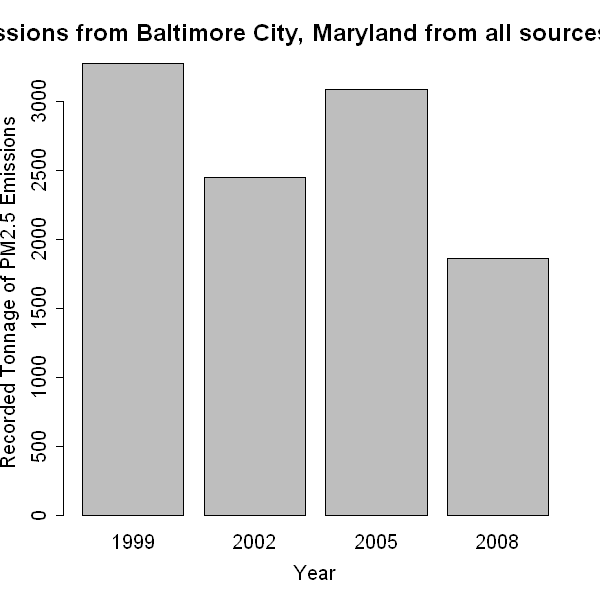

In [33]:
barplot(BaltEmissions, main = "Total Emissions from Baltimore City, Maryland from all sources (1999-2008)", xlab = "Year", ylab = "Recorded Tonnage of PM2.5 Emissions")

### Plot 3 - Of the four types of sources indicated by the type (point, nonpoint, onroad, nonroad) variable, which of these four sources have seen decreases in emissions from 1999–2008 for Baltimore City? Which have seen increases in emissions from 1999–2008? Use the ggplot2 plotting system to make a plot answer this question.

In [4]:
library(dplyr)
library(tidyr)

BaltDataType <- BaltData %>% group_by(type, year) %>% summarize(Emissions = sum(Emissions))
print(BaltDataType)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



Source: local data frame [16 x 3]
Groups: type [?]

       type  year  Emissions
      (chr) (int)      (dbl)
1  NON-ROAD  1999  522.94000
2  NON-ROAD  2002  240.84692
3  NON-ROAD  2005  248.93369
4  NON-ROAD  2008   55.82356
5  NONPOINT  1999 2107.62500
6  NONPOINT  2002 1509.50000
7  NONPOINT  2005 1509.50000
8  NONPOINT  2008 1373.20731
9   ON-ROAD  1999  346.82000
10  ON-ROAD  2002  134.30882
11  ON-ROAD  2005  130.43038
12  ON-ROAD  2008   88.27546
13    POINT  1999  296.79500
14    POINT  2002  569.26000
15    POINT  2005 1202.49000
16    POINT  2008  344.97518


In [5]:
D2 <- with(BaltData, tapply(Emissions, list(year, type), sum))
print(D2)

      NON-ROAD NONPOINT   ON-ROAD     POINT
1999 522.94000 2107.625 346.82000  296.7950
2002 240.84692 1509.500 134.30882  569.2600
2005 248.93369 1509.500 130.43038 1202.4900
2008  55.82356 1373.207  88.27546  344.9752


In [43]:
par(mfrow = c(2,2))

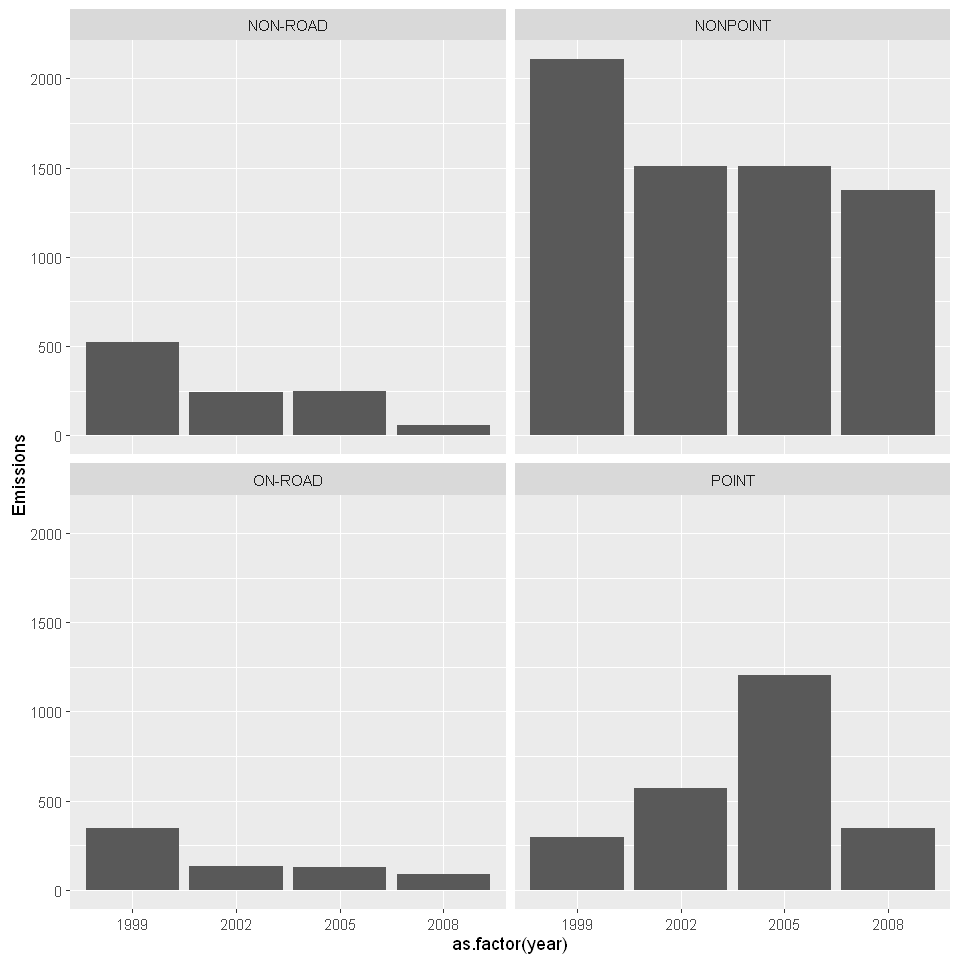

In [19]:
library(ggplot2)

p <- ggplot(BaltDataType, aes(as.factor(year), Emissions))
q <- p + geom_bar(stat = "identity") + facet_wrap(~ type, nrow = 2)
print(q)

### Plot 4 - Across the United States, how have emissions from coal combustion-related sources changed from 1999–2008?

In [109]:
#Take a look at the data contained in SSC
SSC[2011,3]
#head(SSC)

[1] Off-highway CNG /Construction & Mining Equipt /Concrete/Industrial Saws
11238 Levels:  ...

In [110]:
#Pick out the SCC Codes which contian a reference to Coal *I check column 3, 9, 10 and found column 3 to have the most instances 
#and incorpated the all instances of the other columns as well

c0 <- grepl("[cC]oal", SSC[,3])
Coalcodes = SSC[c0,1]

In [152]:
CoalData <- subset(NEI, SCC %in% Coalcodes)
CoalEmissions <- with(CoalData, tapply(Emissions, year, sum))
print(CoalEmissions)

    1999     2002     2005     2008 
602624.1 564940.0 569654.7 358083.9 


### Plot 5 - How have emissions from motor vehicle sources changed from 1999–2008 in Baltimore City?

In [20]:
#Select the motor vehicle's, it took some experimenting to figure out which column best represented motor vehicles.
m0 <- grepl("[vV]eh", SSC[,3])
VehicleCodes = SSC[m0,1]

In [23]:
VehData <- subset(NEI, SCC %in% VehicleCodes)
BLData <- subset(VehData,fips %in% c("24510", "06037"))
BLVeh <- BLData %>% group_by(fips, year) %>% summarize(Emissions = sum(Emissions))
#BLVeh <- with(BLData, tapply(Emissions, list(year, fips), sum))
print(BLVeh)

Source: local data frame [8 x 3]
Groups: fips [?]

   fips  year  Emissions
  (chr) (int)      (dbl)
1 06037  1999 4005.31600
2 06037  2002 4519.12020
3 06037  2005 4848.83493
4 06037  2008 4168.75598
5 24510  1999  346.82000
6 24510  2002  144.47882
7 24510  2005  140.60038
8 24510  2008   88.27546


In [154]:
VehData <- subset(NEI, SCC %in% VehicleCodes)
BaltData <- subset(VehData,fips=="24510") 
BaltVeh <- with(BaltData, tapply(Emissions, year, sum))
print(BaltVeh)

     1999      2002      2005      2008 
346.82000 144.47882 140.60038  88.27546 


### Plot 6 - Compare emissions from motor vehicle sources in Baltimore City with emissions from motor vehicle sources in Los Angeles County, California (fips == "06037"). Which city has seen greater changes over time in motor vehicle emissions?

In [150]:
LAData <- subset(VehData, fips == "06037")
LAVeh <- with(LAData, tapply(Emissions, year, sum))
print(LAVeh)

    1999     2002     2005     2008 
4005.316 4519.120 4848.835 4168.756 


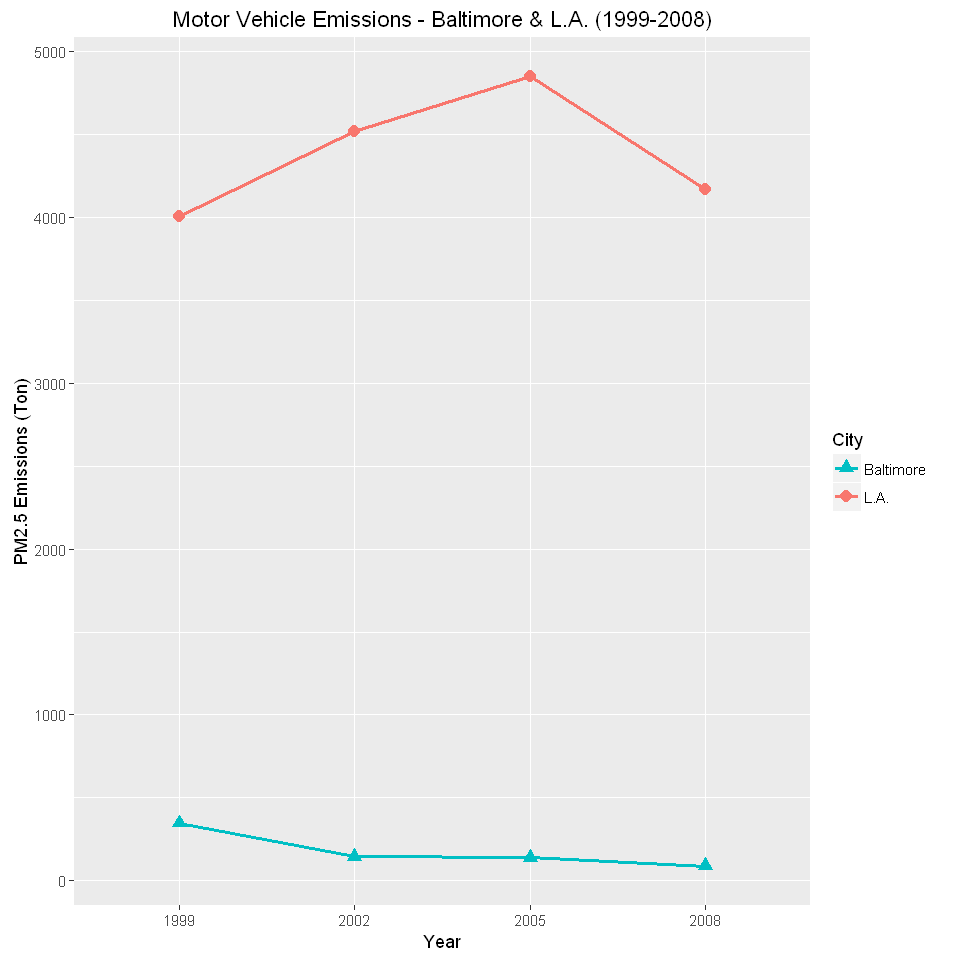

In [35]:

#Subset out the Emissions data with relevant SCC Codes
VehData <- subset(NEI, SCC %in% VehicleCodes)

#Subset the Baltimore City and LA data
BLData <- subset(VehData,fips %in% c("24510", "06037"))

#Group and summarize vehicle emissions
BLVeh <- BLData %>% group_by(fips, year) %>% summarize(Emissions = sum(Emissions))

p6 <- ggplot(BLVeh, aes(x = as.factor(year), y = Emissions, group = fips, colour = fips, shape = fips))
p6 <- p6 + geom_line(lwd = 1) + geom_point(cex = 3)
p6 <- p6 + scale_shape_discrete(name = "City", breaks = c("24510","06037"), labels = c("Baltimore", "L.A."))
p6 <- p6 + scale_colour_discrete(name = "City", breaks = c("24510","06037"), labels = c("Baltimore", "L.A."))
p6 <- p6 + labs(x = "Year", y = "PM2.5 Emissions (Ton)", title = "Motor Vehicle Emissions - Baltimore & L.A. (1999-2008)")
print(p6)